In [1]:
import qiskit
qiskit.__version__

'0.17.4'

## 2 qubit

In [20]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram
from qiskit import ClassicalRegister, QuantumRegister, execute

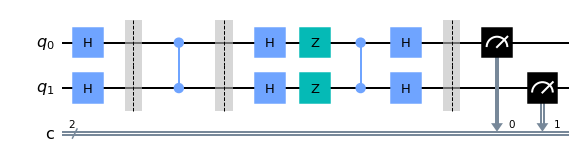

In [17]:
n = 2
n_q = n
n_b = n

## input
qc_init = QuantumCircuit(n_q, n_b)
qc_init.h(0)
qc_init.h(1)
qc_init.barrier()

## oracle
oracle = QuantumCircuit(n_q, n_b)
oracle.cz(0,1)
oracle.barrier()

##  Inversion about mean
diffuser = QuantumCircuit(n_q, n_b)
diffuser.h(0)
diffuser.h(1)
diffuser.z(0)
diffuser.z(1)
diffuser.cz(0,1)
diffuser.h(0)
diffuser.h(1)
diffuser.barrier()

## measure
qc_output = QuantumCircuit(n_q, n_b)
for j in range(n):
    qc_output.measure(j,j)

qc_grover = qc_init + oracle + diffuser + qc_output

qc_grover.draw("mpl")

In [22]:
sv_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(qc_grover, sv_sim)
statevec = job_sim.result().get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext="|\\psi\\rangle =")

<IPython.core.display.Math object>

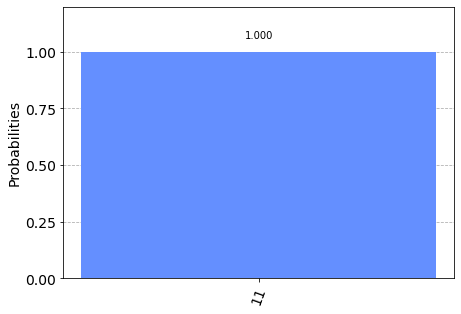

In [18]:
sim = Aer.get_backend('qasm_simulator')
qobj = assemble(qc_grover)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)